# SpekPy tool for modeling X-ray spectrum

In [32]:
import spekpy as sp
import matplotlib.pyplot as plt

Спектр излучения рентгеновской трубки без фильтра для различных напряжений на аноде

70 кВ 0.01759218703118813 мм Al 6568.02 мкрГр
80 кВ 0.019675894057536763 мм Al 6449.51 мкрГр
100 кВ 0.021941088019691524 мм Al 6220.55 мкрГр
120 кВ 0.021830290868025005 мм Al 6078.64 мкрГр
140 кВ 0.020031680666973802 мм Al 6036.9 мкрГр


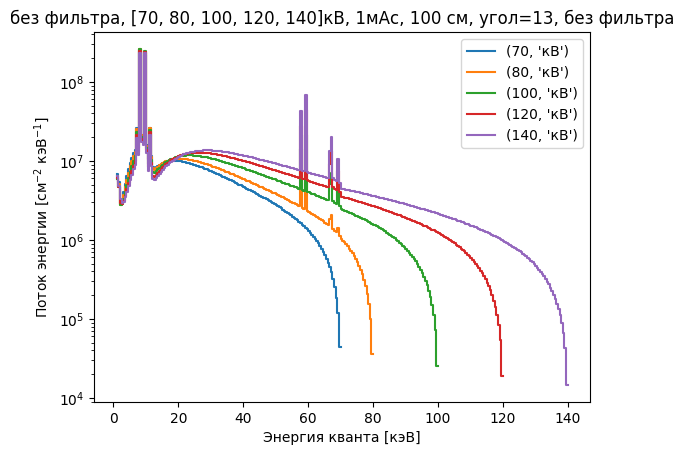

In [33]:
#mas можно задавать в функции, миллиампер-секунда
#Вольфрамовый анод, спектры в зависимости от напряжения
#1 мА*с - по умолчанию
#Варьируем напряжение на аноде без фильтра
s=sp.Spek (kvp=100, th=13, targ='W', z=100) #Расстояние z в сантиметрах от анода до плоскости детекции
  
for pot in [70, 80, 100, 120, 140]:
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(pot, 'кВ'))
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления. По умолчанию - Алюминий.(z не влияет).
#Фильтры считаются без толщины
    kerm=s.get_kerma() #Поглощённая доза в воздуха на расстоянии 100 см от анода на центральной оси (x=0,y=0,z=100)
    print (pot, "кВ", hvl, "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия кванта [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.yscale('log')
plt.legend()
plt.title('без фильтра, [70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, без фильтра')
plt.show()

Спектр излучения рентгеновской трубки с фильтром для различных напряжений на аноде:

70 кВ 3.8175969633873703 мм Al 25.55 мкрГр
80 кВ 4.352016678472714 мм Al 35.56 мкрГр
100 кВ 5.382694171656661 мм Al 59.69 мкрГр
120 кВ 6.319235745027163 мм Al 88.26 мкрГр
140 кВ 7.168912299805841 мм Al 120.46 мкрГр


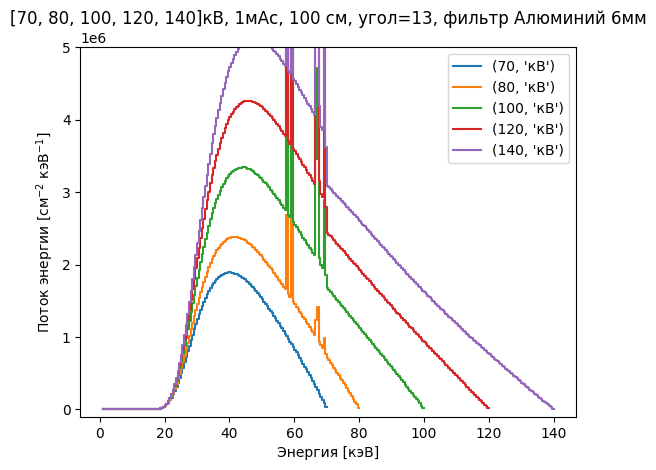

In [51]:
#Варьируем напряжение на аноде с фильтром
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
s.filter('Al',6) #Фильтр в миллиметрах
for pot in [70, 80, 100, 120, 140]:
    s.set(kvp=pot)
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(pot, 'кВ'))
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления. По умолчанию - Алюминий
    kerm=s.get_kerma() #Поглощённая доза в воздуха на расстоянии 100 см от анода на центральной оси (x=0,y=0,z=100)
    print (pot, "кВ", hvl, "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.ylim(-1e5,5e6)
plt.title('[70, 80, 100, 120, 140]кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 6мм')
plt.show()

Спектр излучения рентгеновской трубки для Ua=100кВ для различных толщин фильтра из алюминия

100 кВ; 2.017207765047552 мм Al; 211.62 мкрГр
100 кВ; 3.769538163490692 мм Al; 106.26 мкрГр
100 кВ; 4.924776705171302 мм Al; 70.45 мкрГр
100 кВ; 5.783799231621252 мм Al; 51.39 мкрГр
100 кВ; 6.456460126021354 мм Al; 39.39 мкрГр


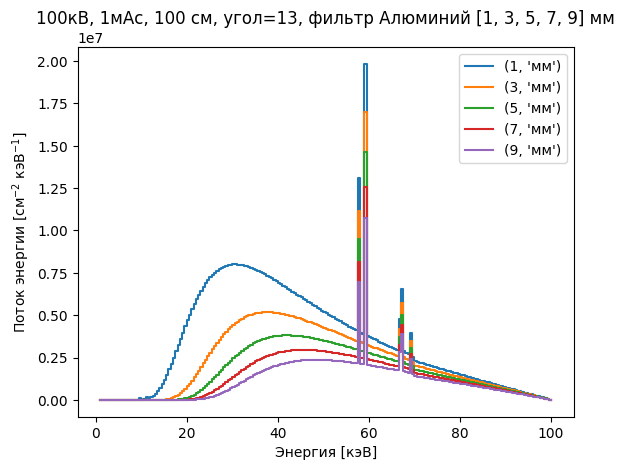

In [42]:
#Варьируем толщину фильтра из алюминия
s=sp.Spek (kvp=100, th=13, targ='W', z=100) 
pot=100
for filt in [1, 3, 5, 7, 9]: #Реальные значения толщины фильтров в мм, не аддитивно
    s.filter('Al',filt) #Фильтр в миллиметрах
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(filt, 'мм'))
    hvl=s.get_hvl1() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе в осевой точке на расстоянии z от источника
    s.filter('Al',-filt) #вычитаем фильтр, чтобы потом добавить другой
    print (pot, "кВ;", hvl, "мм Al;", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий [1, 3, 5, 7, 9] мм')
plt.show()

Спектр излучения рентгеновской трубки для Ua=100кВ для различных толщин фильтра из воды

100 кВ 6.49593354433565 мм Al 11.9 мкрГр
100 кВ 7.3466270539286604 мм Al 4.64 мкрГр
100 кВ 8.015092800820081 мм Al 1.89 мкрГр
100 кВ 8.556974522613592 мм Al 0.79 мкрГр
100 кВ 9.007381710378981 мм Al 0.34 мкрГр


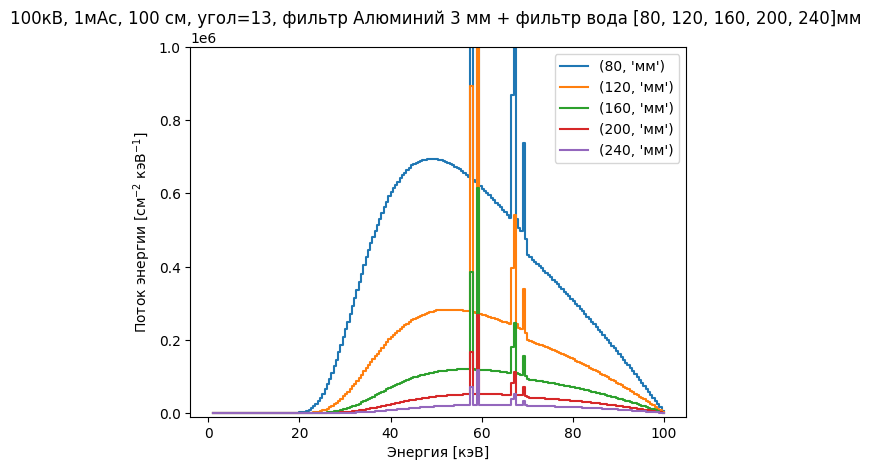

In [52]:
#Варьируем тощину слоя воды
s=sp.Spek (kvp=100, th=13, targ='W', z=100) #Для 1 мАс
s.filter('Al',3) #Фильтр в миллиметрах
i=0
pot=100
for water_thickness in [80, 120, 160, 200, 240]: #Не аддитивно, в мм
    s.filter('water', water_thickness) #Фильтр в мм
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(int(water_thickness), 'мм'))
    hvl=s.get_hvl() #Расчёт слоя половинного ослабления
    kerm=s.get_kerma() # Поглощённая доза в воздухе в осевой точке на расстоянии z от источника
    s.filter('water', -water_thickness)
    print (pot, "кВ", hvl, "мм Al", round (kerm,2), "мкрГр")
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток энергии [см$^{-2}$ кэВ$^{-1}$]')
plt.legend()
plt.title('100кВ, 1мАс, 100 см, угол=13, фильтр Алюминий 3 мм + фильтр вода [80, 120, 160, 200, 240]мм ')
plt.ylim(-1e4,1e6)
plt.show()

Спектр излучения в единицах измерения Дж/(м^2*нм)

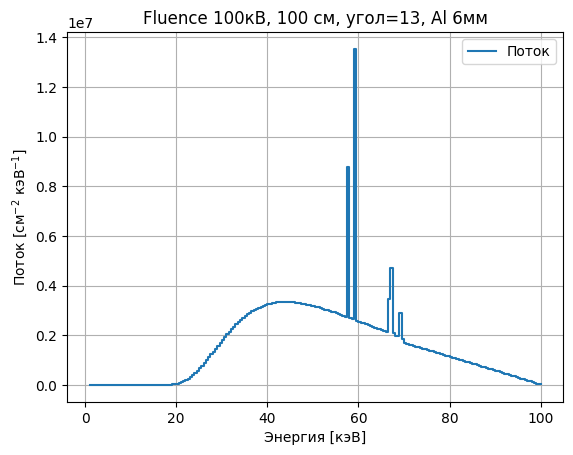

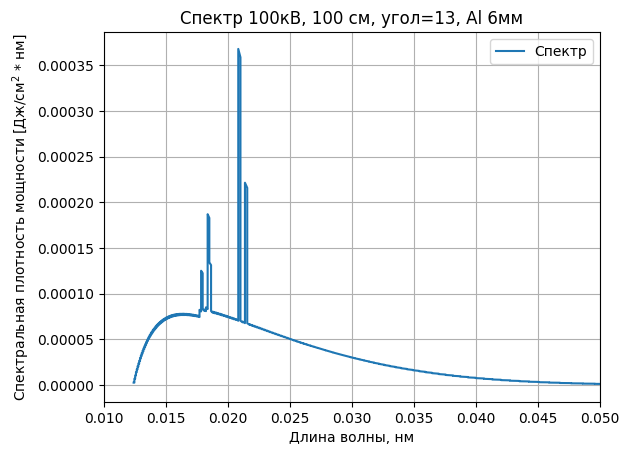

0.0123984 нм - минимальная длина волны излучения
Проверка:
 1.3414262266098799e-06 - [Дж/cм^2] полная энергия от fluence (cм^-2*кэВ^-1)
 1.3415518080512727e-06 - [Дж/cм^2] Полная энергия от спектра Дж/(cм^2*нм)


In [53]:
import spekpy as sp
import numpy as np
pot=100
s=sp.Spek (kvp=pot, th=13, targ='W', z=100)
s.filter('Al',6) #Фильтр в миллиметрах
k, phi_k= s.get_spectrum (edges=True) #k - дискретный массив энергии E, phi_k  - N(E)/(S*E)
plt.plot(k, phi_k, label=('Поток'))
plt.xlabel('Энергия [кэВ]')
plt.ylabel('Поток [см$^{-2}$ кэВ$^{-1}$]')
plt.title('Fluence 100кВ, 100 см, угол=13, Al 6мм')
plt.legend()
plt.grid()
plt.show()

wavelength = 1.23984/k  # λ(nm)= 1.23984 / E(кэВ), Делаем соответствие длины волны кванта и его энергии
energy = (k ** 2) * phi_k * 1.602e-16 #Домножаем 2 раза на вектор энергий, чтобы получить кэВ/см^2. Умножаем на e*10^3 для перехода к Дж
plt.plot(wavelength, energy/wavelength, label=('Спектр')) #Делим вектор энергий на длину волны
plt.xlabel('Длина волны, нм')
plt.ylabel('Спектральная плотность мощности [Дж/cм$^{2}$ * нм]')
plt.title('Спектр 100кВ, 100 см, угол=13, Al 6мм')
plt.xlim(0.01,0.05)
plt.legend()
plt.grid()
plt.show()
print (min(wavelength), "нм - минимальная длина волны излучения")
#Почему не Вт? Потому что на входе в этой библиотеке идёт известная порция "энергии" в виде мАс
total_energy1=s.get_eflu()*1.602e-16 #Считаем полную энергию потока
total_energy2=np.abs(np.trapezoid(energy/wavelength, wavelength, axis = -1)) #Считаем площадь под графиком спектра
print('Проверка:\n', total_energy1, '- [Дж/cм^2] полная энергия от fluence (cм^-2*кэВ^-1)\n', total_energy2, '- [Дж/cм^2] Полная энергия от спектра Дж/(cм^2*нм)')

Считаем полную энергию потока для разных напряжений анода [10;150] и сравниваем с зависимость W=k*U^2

In [54]:
#Считаем полную энергия для разных напряжений
import numpy as np #Тут считаем массивы
s=sp.Spek (kvp=10, th=13, targ='W', z=100) #от 10 до 150 кВ
pot=10
pwr=[]
pot_range=[]
while pot<=150:
    pot_range.append(pot)
    s.set(kvp=pot)
    pwr.append(s.get_eflu())
    #pwr.append(s.get_flu())
    pot=pot+10

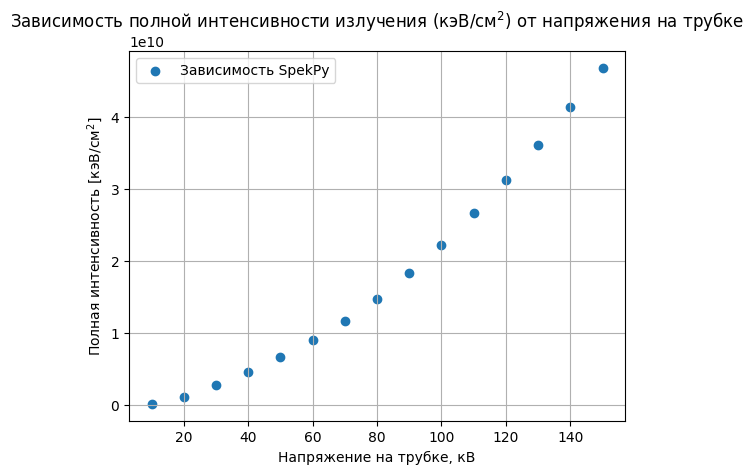

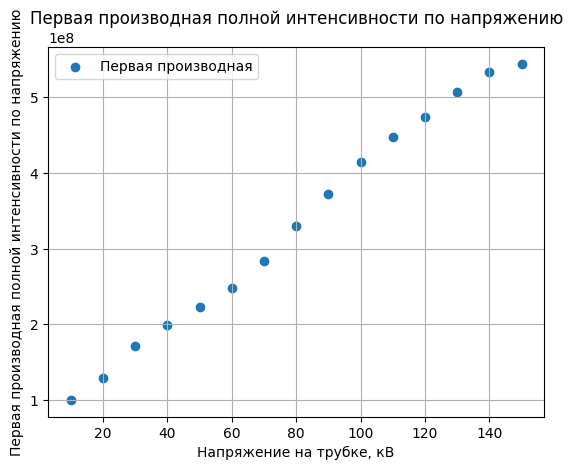

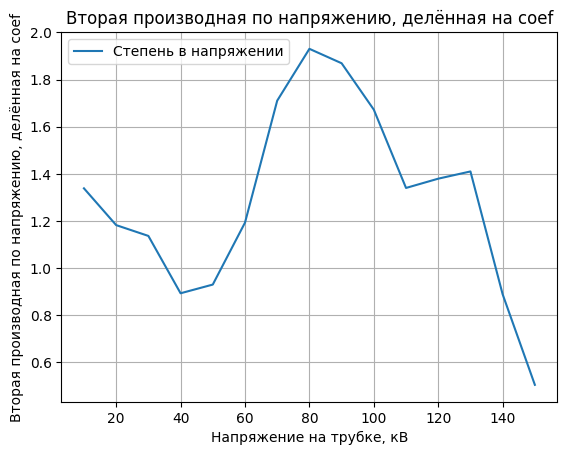

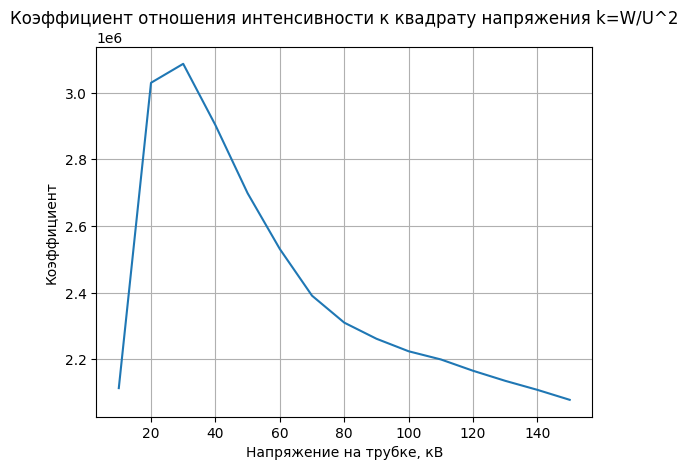

3.297526942663881 Отношение энергии при 100кВ и 50 кВ. Не в 4 раза увеличение!)
2.0 Отношение напряжения 100кВ и 50 кВ


In [55]:
#Тут строим эти массивы
pwr_np=np.array(pwr)
pot_range_np=np.array(pot_range)
koef=pwr_np/(pot_range_np ** 2)
plt.scatter(pot_range_np, pwr_np, label=('Зависимость SpekPy'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Полная интенсивность [кэВ/см$^{2}$]')
plt.title('Зависимость полной интенсивности излучения (кэВ/см$^{2}$) от напряжения на трубке')
plt.legend()
plt.grid()
plt.show()
dydx=np.gradient(pwr_np, pot_range_np) #Считаем "производную"
plt.scatter(pot_range_np, dydx, label=('Первая производная'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Первая производная полной интенсивности по напряжению')
plt.title('Первая производная полной интенсивности по напряжению')
plt.legend()
plt.grid()
plt.show()
dydx2=np.gradient(dydx, pot_range_np) #Считаем вторую"производную"
#разделим на koef пропорциональности
plt.plot(pot_range_np, dydx2/koef, label=('Степень в напряжении')) #Делим вторую производную на коэффициент, чтобы получить показатель степени
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Вторая производная по напряжению, делённая на coef')
plt.title('Вторая производная по напряжению, делённая на coef')
plt.legend()
plt.grid()
plt.show()
#Коэффициент k=W/U^2 зависит от напряжения
plt.plot(pot_range_np, koef)
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Коэффициент')
plt.title('Коэффициент отношения интенсивности к квадрату напряжения k=W/U^2') #Коэффициент зависит от напряжения
#Видимо, на больших напряжениях электроны проелтают глубже в анод и поэтому излучение больше рассеивается?
plt.grid()
plt.show()
print(pwr_np[9]/pwr_np[4], 'Отношение энергии при 100кВ и 50 кВ. Не в 4 раза увеличение!)')
print(pot_range_np[9]/pot_range_np[4], 'Отношение напряжения 100кВ и 50 кВ')

Считаем дозу, поглощённую в воде, в зависимости от анодного напряжения кВ. Делаем общую интенсивность излучения после фильтров постоянной

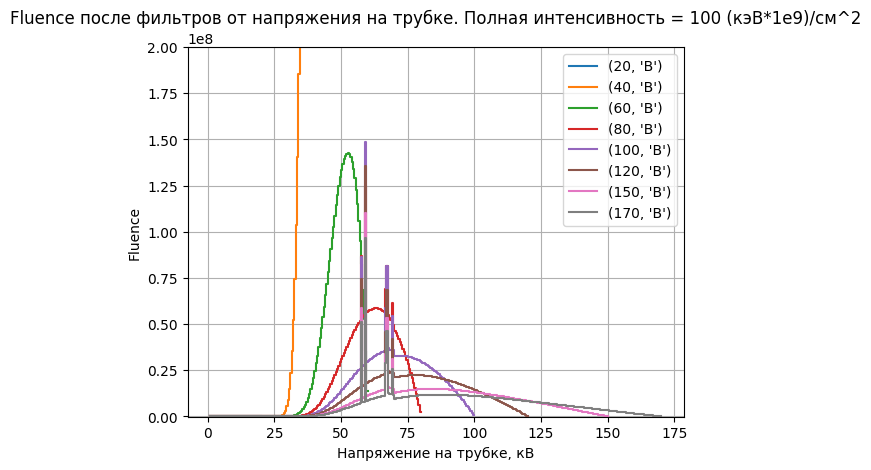

75 мм, Толщина воды


,"Ua, кВ","W, (кэВ*1e9)/см^2","mas, мАс","kerm_total, мкГр","kerm_after water, мкГр","kerm_absorbed in water, мкГр",%_absorbed
0,20,0.00,1000000.00,0.00,0.00,0.00,99.80
1,40,100.00,698971.50,1349.80,149.85,1199.95,88.90
2,60,96.95,1944.44,638.62,114.30,524.32,82.10
3,80,93.88,187.50,460.84,97.48,363.36,78.85
4,100,99.86,56.50,437.23,100.59,336.64,76.99
5,120,98.79,24.94,411.28,100.26,311.02,75.62
6,150,98.27,10.94,397.04,103.50,293.54,73.93
7,170,95.79,7.10,384.86,104.03,280.83,72.97


In [119]:
import spekpy as sp
import matplotlib.pyplot as plt
import pandas as pd
#Считаем дозу, поглощённую в воде, в зависимости от анодного напряжения кВ.
total= [[],[],[],[],[],[],[]]
name = ['Ua, кВ', 'W, (кэВ*1e9)/см^2', 'mas, мАс', 'kerm_total, мкГр','kerm_after water, мкГр', 'kerm_absorbed in water, мкГр','%_absorbed']
s=sp.Spek (kvp=100, th=13, targ='W', z=100, mas=100) #Расстояние до детектора 100 см
s.filter('Al',6).filter('Be', 1.0).filter('Cu', 1.0).filter('Air', 300).filter('Zn', 0.1) #Фильтр в миллиметрах
const=100*100*100 #"Фиксируем" 100кВ и 100мАс(Формула Кацман)  
thickness=75 #Толщина воды мм
energy_max=100*1e9
#Предельная интенсивность излучения трубки кэВ/см^2
for pot in [20, 40, 60, 80, 100, 120, 150, 170]:
    s.set(kvp=pot) #Задаём анодное напряжение
    mas=const/(pot ** 2) #Считаем примерный заряд по формуле интенсивности
    s.set(mas=mas) #Задаем заряд
    if pot==20:
        mas=1e6
        s.set(mas=mas)
    if pot==40:
        mas=700000
        s.set(mas=mas)
    if pot==60:
        mas=mas*7
        s.set(mas=mas)
    if pot==80:
        mas=mas*1.2
        s.set(mas=mas)
    energy=s.get_eflu() #Полная энергия отфильтрованного излучения
    while energy>energy_max: #Считаем такой заряд, чтобы при данном анодном напряжении полная интенсивность излучения не превышала 100
        mas=mas-0.5
        s.set(mas=mas)
        energy=s.get_eflu()
    kerm1=s.get_kerma(norm=False) #Керма, НЕ нормализованная на мас. Керма считается на оси в плоскости детектора (z=100)
    s.filter('Water', thickness)
    kerm2=s.get_kerma(norm=False) #Керма, НЕ нормализованная на мас. Для абсолютных значений кермы
    s.filter('Water', -thickness)
    total[0].append(pot)
    total[1].append(round (energy/1e9,2))
    total[2].append(round(mas,2))
    total[3].append(round (kerm1,2))
    total[4].append(round (kerm2,2))
    total[5].append(round((kerm1-kerm2),2))
    total[6].append(round(((kerm1-kerm2)/kerm1)*100,2))
    k, phi_k= s.get_spectrum (edges=True)
    plt.plot(k, phi_k, label=(int(pot), 'В'))
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Fluence')
plt.title('Fluence после фильтров от напряжения на трубке. Полная интенсивность = 100 (кэВ*1e9)/см^2')
plt.legend()
plt.grid()
plt.ylim(-1e5,2e8)
plt.show()
print(thickness,'мм, Толщина воды')
data=dict(zip(name, total))
df = pd.DataFrame(data)
display(df)

<img src="Рисунок.png">

Считаем дозу, поглощённую в воде, в зависимости от толщины фильтра Al (без других фильтров). Делаем общую интенсивность излучения после фильтров постоянной

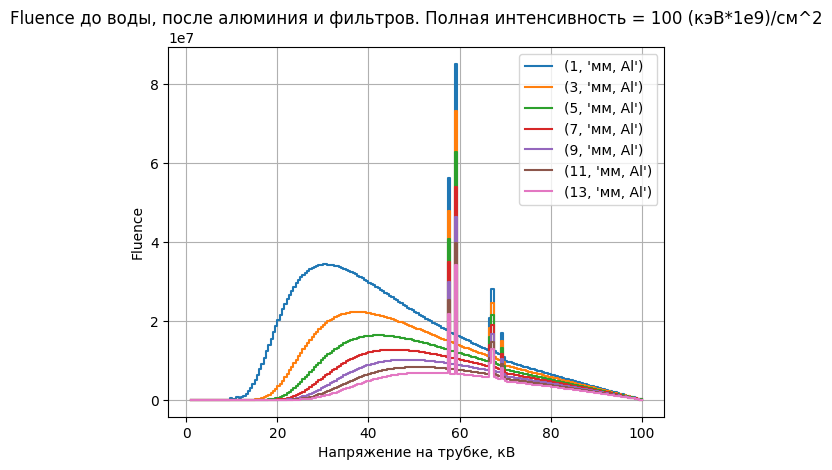

75 мм, Толщина воды


,"Ua, кВ","W, (кэВ*1e9)/см^2","mas, мАс","kerm_total, мкГр","kerm_after water, мкГр","kerm_absorbed in water, мкГр",%_absorbed,"Толщина фильтра Al, мм"
0,100,66.81,4.3,909.98,76.11,833.87,91.64,1
1,100,50.21,4.3,456.91,57.79,399.12,87.35,3
2,100,39.95,4.3,302.94,45.46,257.48,84.99,5
3,100,32.61,4.3,220.97,36.60,184.37,83.44,7
4,100,27.04,4.3,169.40,29.95,139.44,82.32,9
5,100,22.66,4.3,133.89,24.81,109.08,81.47,11
6,100,19.14,4.3,108.04,20.74,87.30,80.81,13


In [118]:
import spekpy as sp
import matplotlib.pyplot as plt
import pandas as pd
total= [[],[],[],[],[],[],[],[]]
name = ['Ua, кВ', 'W, (кэВ*1e9)/см^2', 'mas, мАс', 'kerm_total, мкГр','kerm_after water, мкГр', 'kerm_absorbed in water, мкГр','%_absorbed','Толщина фильтра Al, мм']
Ua=100
mas=100
thickness=75 #Толщина воды мм
s=sp.Spek (kvp=Ua, th=13, targ='W', z=100, mas=mas) #Расстояние до детектора 100 см
#s.filter('Be', 1.0).filter('Cu', 1.0).filter('Air', 300).filter('Zn', 0.1) #Фильтр в миллиметрах
const=100*100*100 #"Фиксируем" 100кВ и 100мАс(Формула Кацман)  
energy_max=100*1e9
#Предельная интенсивность излучения трубки кэВ/см^2
mas=const/(Ua ** 2) #Считаем примерный заряд по формуле интенсивности
s.set(mas=mas) #Задаем заряд
energy=s.get_eflu() #Полная энергия отфильтрованного излучения (без Al)
while energy>energy_max: #Считаем такой заряд, чтобы при данном анодном напряжении полная интенсивность излучения не превышала 100
    mas=mas-0.3
    s.set(mas=mas)
    energy=s.get_eflu() #Делаем так, чтобы после всех фильтров (кроме воды и Al!!!) интенсивность была примерно 100
for filt in [1, 3, 5, 7, 9, 11, 13]:
    s.filter('Al',filt)
    energy=s.get_eflu()
    kerm1=s.get_kerma(norm=False) #Керма, НЕ нормализованная на мас. Керма считается на оси в плоскости детектора (z=100)
    s.filter('Water',thickness)
    kerm2=s.get_kerma(norm=False) #Керма, НЕ нормализованная на мас. Для абсолютных значений кермы
    s.filter('Water',-thickness)
    k, phi_k= s.get_spectrum (edges=True) #Fluence до воды
    plt.plot(k, phi_k, label=(int(filt), 'мм, Al'))
    s.filter('Al',-filt)
    total[0].append(Ua)
    total[1].append(round (energy/1e9,2))
    total[2].append(round(mas,2))
    total[3].append(round (kerm1,2))
    total[4].append(round (kerm2,2))
    total[5].append(round((kerm1-kerm2),2))
    total[6].append(round(((kerm1-kerm2)/kerm1)*100,2))
    total[7].append(filt)
plt.xlabel('Напряжение на трубке, кВ')
plt.ylabel('Fluence')
plt.title('Fluence до воды, после алюминия и фильтров. Полная интенсивность = 100 (кэВ*1e9)/см^2')
plt.legend()
plt.grid()
#plt.ylim(-1e5,2e8)
plt.show()
print(thickness,'мм, Толщина воды')
data=dict(zip(name, total))
df = pd.DataFrame(data)
display(df)

In [117]:
#sp.Spek.show_matls(matl_dir="def") #Все материалы SpekPy